Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


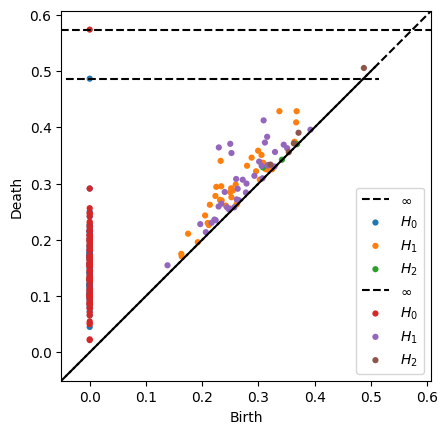

In [8]:
import numpy as np
import ripser
import persim

# Generate some data
X = np.random.rand(100, 3)
Y = np.random.rand(100, 3)

# Compute the Rips complex
rips_complex = ripser.Rips(maxdim=2)
dgms = rips_complex.fit_transform(X)

dgms2 = rips_complex.fit_transform(Y)

# Plot the persistence diagrams
persim.plot_diagrams(dgms)
persim.plot_diagrams(dgms2)


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
0.05700021982192993


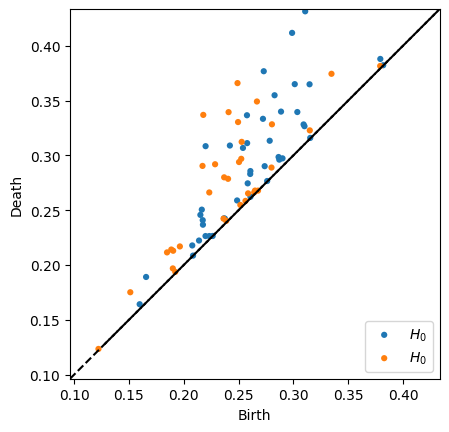

In [11]:
import numpy as np
import ripser
import persim
import matplotlib.pyplot as plt

# Generate some data
X = np.random.rand(100, 3)
Y = np.random.rand(100, 3)

# Compute the persistence diagrams of the Rips complexes
rips_complex_X = ripser.Rips(maxdim=2)
dgms_X = rips_complex_X.fit_transform(X)[1]
rips_complex_Y = ripser.Rips(maxdim=2)
dgms_Y = rips_complex_Y.fit_transform(Y)[1]

# Plot the persistence diagrams
persim.plot_diagrams(dgms_X)
persim.plot_diagrams(dgms_Y)

# Compute the bottleneck distance between the persistence diagrams
dist = persim.bottleneck(dgms_X, dgms_Y)
print(dist)


In [17]:
import numpy as np
import ripser
import persim

# Define the two training representation sequences
seq1 = [np.random.rand(10, 100),np.random.rand(10, 100)]
seq2 = [np.random.rand(12, 100),np.random.rand(10, 100)]

# Compute the persistence diagrams of the Rips complexes for each representation in each sequence
rips_complex = ripser.Rips(maxdim=2)
dgms_seq1 = [rips_complex.fit_transform(rep)[1] for rep in seq1]
dgms_seq2 = [rips_complex.fit_transform(rep)[1] for rep in seq2]

print('dgms_seq1',dgms_seq1)

# Compute the pairwise bottleneck distances between the persistence diagrams
dist_matrix = np.zeros((len(seq1), len(seq2)))
for i, dgms_i in enumerate(dgms_seq1):
    for j, dgms_j in enumerate(dgms_seq2):
        dist_matrix[i, j] = persim.bottleneck(dgms_i, dgms_j)

# Compute the cumulative similarity matrix
sim_matrix = np.zeros((len(seq1), len(seq2)))
for i in range(len(seq1)):
    for j in range(len(seq2)):
        sim_matrix[i, j] = np.exp(-dist_matrix[i, j])

# Find the sequence with the highest cumulative similarity
sim_sum_seq2 = np.sum(sim_matrix, axis=0)
aligned_seq2 = seq2[np.argmax(sim_sum_seq2)]

# Compute the LCS of the reference sequence (seq1) and the aligned sequence (aligned_seq2)
LCS = []
i = len(seq1) - 1
j = len(aligned_seq2) - 1
while i >= 0 and j >= 0:
    if np.allclose(seq1[i], aligned_seq2[j]):
        LCS.append(i)
        i -= 1
        j -= 1
    elif sim_matrix[i, j-1] > sim_matrix[i-1, j]:
        j -= 1
    else:
        i -= 1
LCS.reverse()

print("LCS indices:", LCS)
print("LCS length:", len(LCS))


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
dgms_seq1 [array([[3.99049187, 4.09799767],
       [3.94269991, 3.97572231],
       [3.84827566, 3.90822744]]), array([[4.06440496, 4.07220125],
       [3.93389893, 3.94961548],
       [3.80552149, 3.94961548]])]


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "


IndexError: index 8 is out of bounds for axis 1 with size 2

In [22]:
import numpy as np
import ripser
import persim

# Define the two training representation sequences
seq1 = [np.random.rand(10, 100),np.random.rand(10, 100)]
seq2 = [np.random.rand(12, 100),np.random.rand(10, 100)]

# Compute the persistence diagrams of the Rips complexes for each representation in each sequence
rips_complex = ripser.Rips(maxdim=2)
dgms_seq1 = [rips_complex.fit_transform(rep)[1] for rep in seq1]
dgms_seq2 = [rips_complex.fit_transform(rep)[1] for rep in seq2]

# Compute the pairwise bottleneck distances between the persistence diagrams
dist_matrix = np.zeros((len(dgms_seq1), len(dgms_seq2)))
for i, dgms_i in enumerate(dgms_seq1):
    for j, dgms_j in enumerate(dgms_seq2):
        dist_matrix[i, j] = persim.bottleneck(dgms_i, dgms_j)

# Compute the cumulative similarity matrix
sim_matrix = np.zeros((len(dgms_seq1), len(dgms_seq2)))
for i in range(len(dgms_seq1)):
    for j in range(len(dgms_seq2)):
        sim_matrix[i, j] = np.exp(-dist_matrix[i, j])

# Find the sequence with the highest cumulative similarity
sim_sum_seq2 = np.sum(sim_matrix, axis=0)
aligned_seq2 = seq2[np.argmax(sim_sum_seq2)]

# Compute the LCS of the reference sequence (seq1) and the aligned sequence (aligned_seq2)
LCS = []
i = len(seq1) - 1
j = len(aligned_seq2) - 1
while i >= 0 and j >= 0:
    if np.allclose(seq1[i], aligned_seq2[j]):
        LCS.append(i)
        i -= 1
        j -= 1
    elif j > 0 and sim_matrix[i, j-1] > sim_matrix[i-1, j]:
        j -= 1
    else:
        i -= 1
LCS.reverse()

print("LCS indices:", LCS)
print("LCS length:", len(LCS))


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
(2,)
(10, 100)


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "


IndexError: index 8 is out of bounds for axis 1 with size 2

In [26]:
import numpy as np
import ripser
import persim

# Define the two training representation sequences
seq1 = [np.random.rand(10, 100), np.random.rand(10, 100)]
seq2 = [np.random.rand(12, 100), np.random.rand(10, 100)]

# Compute the persistence diagrams of the Rips complexes for each representation in each sequence
rips_complex = ripser.Rips(maxdim=2)
dgms_seq1 = [rips_complex.fit_transform(rep)[1] for rep in seq1]
dgms_seq2 = [rips_complex.fit_transform(rep)[1] for rep in seq2]

print('dgms_seq1',dgms_seq1)

# Compute the pairwise bottleneck distances between the persistence diagrams
dist_matrix = np.zeros((len(seq1), len(seq2)))
for i, dgms_i in enumerate(dgms_seq1):
    for j, dgms_j in enumerate(dgms_seq2):
        dist_matrix[i, j] = persim.bottleneck(dgms_i, dgms_j)

# Compute the cumulative similarity matrix
sim_matrix = np.zeros((len(seq1), len(seq2)))
for i in range(len(seq1)):
    for j in range(len(seq2)):
        sim_matrix[i, j] = np.exp(-dist_matrix[i, j])

# Find the sequence with the highest cumulative similarity
sim_sum_seq2 = np.sum(sim_matrix, axis=0)
aligned_seq2 = seq2[np.argmax(sim_sum_seq2)]

print(aligned_seq2.shape)
# Compute the LCS of the reference sequence (seq1) and the aligned sequence (aligned_seq2)
LCS = []
i = len(seq1) - 1
j = len(aligned_seq2) - 1
while i >= 0 and j >= 0:
    if np.allclose(seq1[i], aligned_seq2[j]):
        LCS.append(i)
        i -= 1
        j -= 1
    elif j > 0 and sim_matrix[i, j-1] > sim_matrix[i-1, j]:
        j -= 1
    else:
        i -= 1
LCS.reverse()

print("LCS indices:", LCS)
print("LCS length:", len(LCS))


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
dgms_seq1 [array([[3.95045424, 4.04001379],
       [3.93453646, 3.98188972],
       [3.93385696, 3.96129894],
       [3.91282678, 4.04001379],
       [3.88354707, 3.98113322]]), array([[3.93331242, 4.04162931],
       [3.91602087, 3.92541528],
       [3.86585903, 3.92541528],
       [3.83495569, 3.90031528],
       [3.76261377, 4.03295803]])]
(12, 100)


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "
/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ripser/ripser.py:254: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "


IndexError: index 10 is out of bounds for axis 1 with size 2

In [33]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels

# Define the two training representation sequences
seq1 = [np.random.rand(10, 100), np.random.rand(10, 100)]
seq2 = [np.random.rand(12, 100), np.random.rand(10, 100)]

# Compute the CKA similarity matrix between each representation in the two sequences
sim_matrix = np.zeros((len(seq1), len(seq2)))
for i, rep_i in enumerate(seq1):
    for j, rep_j in enumerate(seq2):
        sim_matrix[i, j] = np.trace(pairwise_kernels(rep_i, rep_j, metric='linear') /
                                    np.sqrt(np.trace(pairwise_kernels(rep_i, rep_i, metric='linear'))) /
                                    np.sqrt(np.trace(pairwise_kernels(rep_j, rep_j, metric='linear'))))

# Compute the pairwise distance matrix using the CKA similarity matrix
dist_matrix = np.sqrt(2*(1-sim_matrix))

# Compute the cumulative similarity matrix
sim_cum_matrix = np.zeros((len(seq1), len(seq2)))
sim_cum_matrix[0, 0] = sim_matrix[0, 0]
for i in range(1, len(seq1)):
    sim_cum_matrix[i, 0] = sim_cum_matrix[i-1, 0] + sim_matrix[i, 0]
for j in range(1, len(seq2)):
    sim_cum_matrix[0, j] = sim_cum_matrix[0, j-1] + sim_matrix[0, j]
for i in range(1, len(seq1)):
    for j in range(1, len(seq2)):
        sim_cum_matrix[i, j] = sim_matrix[i, j] + max(sim_cum_matrix[i-1, j], sim_cum_matrix[i, j-1])

# Find the sequence with the highest cumulative similarity
sim_sum_seq2 = sim_cum_matrix[-1, :]
aligned_seq2 = seq2[np.argmax(sim_sum_seq2)]

# Compute the LCS of the reference sequence (seq1) and the aligned sequence (aligned_seq2)
LCS = []
i = len(seq1) - 1
j = len(aligned_seq2) - 1

while i >= 0 and j >= 0:
    if np.allclose(seq1[i], aligned_seq2[j]):
        LCS.append(i)
        i -= 1
        j -= 1
    # elif j == 0 or sim_cum_matrix[i, j-1] > sim_cum_matrix[i-1, j]:
    #     j -= 1
    # elif i == 0 or sim_cum_matrix[i, j-1] <= sim_cum_matrix[i-1, j]:
    #     i -= 1
LCS.reverse()

print("LCS indices:", LCS)
print("LCS length:", len(LCS))



KeyboardInterrupt: 

In [34]:
import torch
from torch.nn.functional import cosine_similarity

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
def compute_cka_matrix(x, y, eps=1e-10):
    x_normalized = x - x.mean(0, keepdim=True)
    y_normalized = y - y.mean(0, keepdim=True)
    x_normalized /= (x_normalized.norm(dim=1, keepdim=True) + eps)
    y_normalized /= (y_normalized.norm(dim=1, keepdim=True) + eps)

    cka_matrix = torch.matmul(x_normalized.T, y_normalized)
    return cka_matrix

In [69]:
reference_sequence = np.random.rand(20, 512, 10)
target_sequence = np.random.rand(20, 512, 10)

In [47]:
reference_sequence = torch.Tensor(reference_sequence) # shape: (200, 5000, 512)
target_sequence = torch.Tensor(target_sequence) # shape: (200, 5000, 512)

cka_matrix = compute_cka_matrix(reference_sequence.view(-1, 512), target_sequence.view(-1, 512))


In [48]:
lcs = []
for i in range(target_sequence.shape[0]-1):
    start_index = i * target_sequence.shape[1]
    end_index = (i+1) * target_sequence.shape[1]
    similarity = cosine_similarity(cka_matrix[start_index:end_index], cka_matrix[end_index:end_index+target_sequence.shape[1]], dim=1)
    index = torch.argmax(similarity)
    lcs.append(index)

RuntimeError: The size of tensor a (50) must match the size of tensor b (12) at non-singleton dimension 0

In [60]:
cka_matrix.shape

torch.Size([512, 512])

In [73]:
import torch
from torch.nn.functional import cosine_similarity

def compute_cka_matrix(x, y, eps=1e-10):
    x_normalized = x - x.mean(0, keepdim=True)
    y_normalized = y - y.mean(0, keepdim=True)
    x_normalized /= (x_normalized.norm(dim=1, keepdim=True) + eps)
    y_normalized /= (y_normalized.norm(dim=1, keepdim=True) + eps)

    cka_matrix = torch.matmul(x_normalized.T, y_normalized)
    return cka_matrix

reference_sequence = torch.Tensor(reference_sequence) # shape: (200, 5000, 512)
target_sequence = torch.Tensor(target_sequence) # shape: (200, 5000, 512)

cka_matrix = compute_cka_matrix(reference_sequence.view(-1, 10), target_sequence.view(-1, 10))

# print('cka_matrix',cka_matrix)

lcs = []
for i in range(target_sequence.shape[0]):
    start_index = i  * target_sequence.shape[1]
    end_index = (i+1)  * target_sequence.shape[1]
    print('start_index',start_index)
    print('end_index',end_index)
    similarity = cosine_similarity(cka_matrix[start_index:end_index, :], cka_matrix[end_index:end_index+target_sequence.shape[1], :], dim=1)
    index = torch.argmax(similarity)
    lcs.append(index)


start_index 0
end_index 512


RuntimeError: The size of tensor a (10) must match the size of tensor b (0) at non-singleton dimension 0

In [76]:
reference_sequence = np.random.rand(20, 512, 10)
target_sequence = np.random.rand(20, 512, 10)

In [79]:
import torch
from torch.nn.functional import cosine_similarity

def compute_cka_matrix(x, y, eps=1e-10):
    x_normalized = x - x.mean(0, keepdim=True)
    y_normalized = y - y.mean(0, keepdim=True)
    x_normalized /= (x_normalized.norm(dim=1, keepdim=True) + eps)
    y_normalized /= (y_normalized.norm(dim=1, keepdim=True) + eps)

    cka_matrix = torch.matmul(x_normalized.permute(2, 0, 1), y_normalized.permute(2, 1, 0))
    cka_matrix = cka_matrix.mean(dim=0)
    return cka_matrix

reference_sequence = torch.Tensor(reference_sequence) # shape: (50000, 512, 200)
target_sequence = torch.Tensor(target_sequence) # shape: (50000, 512, 200)

cka_matrix = compute_cka_matrix(reference_sequence, target_sequence)

lcs = []
for i in range(target_sequence.shape[2]-1):
    similarity = cosine_similarity(cka_matrix[:, i].unsqueeze(0), cka_matrix[:, i+1].unsqueeze(1), dim=0)
    index = torch.argmax(similarity)
    print('similarity',similarity)
    lcs.append(index)


similarity tensor([-0.0004, -0.0004,  0.0004, -0.0004,  0.0004,  0.0004,  0.0004, -0.0004,
         0.0004, -0.0004,  0.0004, -0.0004, -0.0004,  0.0004,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004, -0.0004])
similarity tensor([ 0.0009,  0.0009, -0.0009,  0.0009,  0.0009, -0.0009,  0.0009,  0.0009,
         0.0009, -0.0009, -0.0009,  0.0009, -0.0009, -0.0009,  0.0009,  0.0009,
         0.0009, -0.0009, -0.0009,  0.0009])
similarity tensor([ 0.0039, -0.0039, -0.0039,  0.0039, -0.0039,  0.0039,  0.0039, -0.0039,
        -0.0039,  0.0039,  0.0039, -0.0039,  0.0039, -0.0039, -0.0039, -0.0039,
        -0.0039,  0.0039, -0.0039,  0.0039])
similarity tensor([-0.0072,  0.0072, -0.0072,  0.0072, -0.0072, -0.0072, -0.0072,  0.0072,
        -0.0072,  0.0072, -0.0072, -0.0072,  0.0072,  0.0072,  0.0072, -0.0072,
         0.0072,  0.0072, -0.0072, -0.0072])
similarity tensor([-0.0082, -0.0082,  0.0082, -0.0082, -0.0082, -0.0082, -0.0082,  0.0082,
         0.0082,  0.0082, -0.0082,  0.0082, -

In [78]:
lcs

[tensor(2),
 tensor(0),
 tensor(0),
 tensor(17),
 tensor(7),
 tensor(3),
 tensor(3),
 tensor(5),
 tensor(18)]

In [81]:
import torch
from torch.nn.functional import cosine_similarity

def compute_cka_matrix(x, y, eps=1e-10):
    x_normalized = x - x.mean(0, keepdim=True)
    y_normalized = y - y.mean(0, keepdim=True)
    x_normalized /= (x_normalized.norm(dim=1, keepdim=True) + eps)
    y_normalized /= (y_normalized.norm(dim=1, keepdim=True) + eps)

    cka_matrix = torch.matmul(x_normalized.permute(2, 0, 1), y_normalized.permute(2, 1, 0))
    cka_matrix = cka_matrix.mean(dim=0)
    return cka_matrix

reference_sequence = torch.Tensor(reference_sequence) # shape: (50000, 512, 200)
target_sequence = torch.Tensor(target_sequence) # shape: (50000, 512, 200)

cka_matrix = compute_cka_matrix(reference_sequence, target_sequence)

lcs = []
for i in range(target_sequence.shape[2]-1):
    similarity = cosine_similarity(cka_matrix[:, i].unsqueeze(0), cka_matrix[:, i+1].unsqueeze(1), dim=0)
    index = torch.argmax(similarity)
    lcs.append(index)

lcs.append(reference_sequence.shape[2]-1) # add the last epoch index to LCS

aligned_target_sequence = torch.empty_like(target_sequence)
aligned_target_sequence[:, :, lcs] = target_sequence[:, :, range(reference_sequence.shape[2])]


In [82]:
lcs

[tensor(2),
 tensor(0),
 tensor(0),
 tensor(17),
 tensor(7),
 tensor(3),
 tensor(3),
 tensor(5),
 tensor(18),
 9]

In [24]:
import torch
import numpy as np

# Define the input data
target_seq = torch.randn((20, 50, 512))
ref_seq = torch.randn((20, 50, 512))

def longest_common_subsequence(seq1, seq2):
    m, n = len(seq1), len(seq2)
    # Initialize the LCS matrix
    lcs = torch.zeros((m+1, n+1), dtype=torch.long)
    # Fill the LCS matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if seq1[i-1] == seq2[j-1]:
                lcs[i][j] = lcs[i-1][j-1] + 1
            else:
                lcs[i][j] = max(lcs[i-1][j], lcs[i][j-1])
    # Extract the LCS sequence
    lcs_seq = []
    i, j = m, n
    while i > 0 and j > 0:
        if seq1[i-1] == seq2[j-1]:
            lcs_seq.append(seq1[i-1])
            i -= 1
            j -= 1
        elif lcs[i-1][j] > lcs[i][j-1]:
            i -= 1
        else:
            j -= 1
    lcs_seq.reverse()
    return lcs_seq

# Define a function to compute the CKA
def cka(X, Y):
    X = X - torch.mean(X, dim=0, keepdim=True)
    X = X / torch.norm(X, dim=0, keepdim=True)
    Y = Y - torch.mean(Y, dim=0, keepdim=True)
    Y = Y / torch.norm(Y, dim=0, keepdim=True)
    cov_xx = torch.matmul(X.T, X)
    cov_xy = torch.matmul(X.T, Y)
    cov_yy = torch.matmul(Y.T, Y)
    sqrt_xx = torch.sqrt(torch.diag(cov_xx))
    sqrt_yy = torch.sqrt(torch.diag(cov_yy))
    inv_sqrt = 1.0 / torch.sqrt(sqrt_xx * sqrt_yy)
    r = torch.matmul(torch.matmul(torch.matmul(inv_sqrt[:, None] * cov_xy * inv_sqrt[None, :], inv_sqrt[:, None] * cov_xy * inv_sqrt[None, :]).sum(), cov_xx), cov_yy)
    return r / (torch.trace(cov_xx) * torch.trace(cov_yy))

def mse(X,Y):
    # mse = np.mean((X - Y) ** 2)
    mse = torch.mean((X - Y) ** 2)
    # Compute the maximum possible MSE for this data range
    max_mse = torch.max((X - Y) ** 2)

    # Normalize the MSE to be in the range [0, 1]
    normalized_mse = mse / max_mse
    return normalized_mse.mean()

# Calculate the CKA between all pairs of epochs
ckas = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        value = mse(target_seq[i], ref_seq[j])
        if value > 0.05:
            value = -1
        ckas[i, j] = value

# Find the highest CKA value and use it to align the epochs
# max_cka = np.max(ckas)
# max_idx = np.unravel_index(np.argmax(ckas), ckas.shape)
# aligned_epoch = max_idx[1]
# target_aligned = target_seq[max_idx[0]]
# ref_aligned = ref_seq[max_idx[1]]

# Calculate the LCS between the target and reference training process epochs
# lcs = longest_common_subsequence(target_aligned, ref_aligned)


In [25]:
ckas

array([[-1.        , -1.        , -1.        ,  0.04767213, -1.        ,
        -1.        , -1.        , -1.        ,  0.04659526, -1.        ,
         0.04866127, -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
         0.04705418, -1.        , -1.        ,  0.04626458, -1.        ,
        -1.        , -1.        ,  0.04806111, -1.        , -1.        ,
         0.04142594, -1.        , -1.        , -1.        , -1.        ],
       [-1.        ,  0.04633772, -1.        ,  0.04217297, -1.        ,
        -1.        , -1.        ,  0.04452513, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        ,  0.04755581, -1.        ,  0.03867053, -1.        ,
        -1.        , -1.        , -1.        , -

In [13]:
max_idx

(12, 2)

In [12]:
target_aligned


tensor([[ 0.8531,  0.0803, -1.0817,  ..., -0.8061, -1.9327,  0.8800],
        [-0.1275, -0.3150,  0.3695,  ...,  2.2531,  0.4571, -0.8513],
        [-1.0355, -2.4665,  0.5566,  ...,  0.1854,  0.1868, -1.7487],
        ...,
        [ 0.4996,  0.7384,  0.0837,  ..., -1.4635, -2.1043,  1.0077],
        [-2.3189, -2.2826,  0.1331,  ...,  0.0408,  0.1626,  0.1617],
        [-0.8177, -0.8503, -0.5152,  ..., -0.3535, -0.6629, -0.3834]])

In [4]:
target_seq[1].shape

torch.Size([50, 512])